In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 69.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


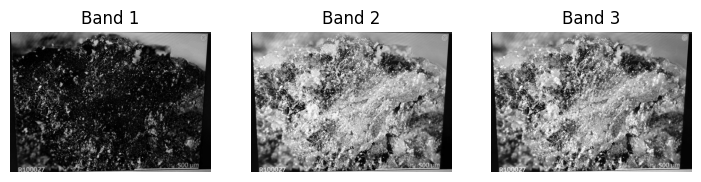

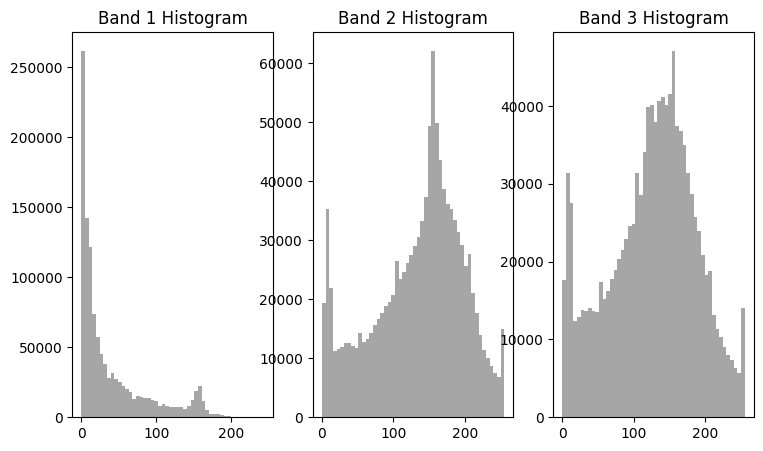

   Band        Mean  Min  Max        Std
0     1   39.441506    0  243  47.602836
1     2  134.151198    0  255  62.949583
2     3  125.300315    0  255  60.984076


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import rasterio

# Load the spectral data (from .tif or .dat file)
def load_spectral_data(file_path):
    if file_path.endswith('.jpeg'):
        with rasterio.open(file_path) as src:
            spectral_data = src.read()  # 3D array (bands, height, width)
        return spectral_data
    elif file_path.endswith('.dat'):
        spectral_data = np.loadtxt(file_path)
        return spectral_data
    else:
        raise ValueError("Unsupported file type")

# Visualize the first few spectral bands
def plot_spectral_bands(spectral_data):
    num_bands = spectral_data.shape[0]  # Number of bands (channels)
    plt.figure(figsize=(15, 5))
    for i in range(min(num_bands, 5)):  # Show first 5 bands
        plt.subplot(1, 5, i + 1)
        plt.imshow(spectral_data[i, :, :], cmap='gray')
        plt.title(f'Band {i+1}')
        plt.axis('off')
    plt.show()

# Plot histograms of pixel values for the first few bands
def plot_histograms(spectral_data):
    num_bands = spectral_data.shape[0]
    plt.figure(figsize=(15, 5))
    for i in range(min(num_bands, 5)):  # Show first 5 bands
        plt.subplot(1, 5, i + 1)
        plt.hist(spectral_data[i, :, :].flatten(), bins=50, color='gray', alpha=0.7)
        plt.title(f'Band {i+1} Histogram')
    plt.show()

# Basic statistics
def basic_statistics(spectral_data):
    band_means = np.mean(spectral_data, axis=(1, 2))
    band_mins = np.min(spectral_data, axis=(1, 2))
    band_maxs = np.max(spectral_data, axis=(1, 2))
    band_std = np.std(spectral_data, axis=(1, 2))

    stats_df = pd.DataFrame({
        'Band': np.arange(1, spectral_data.shape[0] + 1),
        'Mean': band_means,
        'Min': band_mins,
        'Max': band_maxs,
        'Std': band_std
    })
    print(stats_df)

# Example usage
file_path = '/content/WhatsApp Image 2024-12-13 at 13.02.33.jpeg'
spectral_data = load_spectral_data(file_path)
plot_spectral_bands(spectral_data)
plot_histograms(spectral_data)
basic_statistics(spectral_data)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize spectral data
def normalize_data(spectral_data):
    flattened_data = spectral_data.reshape(-1, spectral_data.shape[-1])
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(flattened_data)
    normalized_data = normalized_data.reshape(spectral_data.shape)
    return normalized_data

# Example usage
normalized_data = normalize_data(spectral_data)



In [ ]:
normalized_data

array([[[0.05      , 0.11111111, 0.18      , ..., 0.21022727,
         0.21022727, 0.20571429],
        [0.05      , 0.11111111, 0.18      , ..., 0.21022727,
         0.20454545, 0.20571429],
        [0.05      , 0.14814815, 0.2       , ..., 0.20454545,
         0.20454545, 0.2       ],
        ...,
        [0.5       , 0.33333333, 0.24      , ..., 0.65340909,
         0.64772727, 0.65142857],
        [0.5       , 0.33333333, 0.24      , ..., 0.65340909,
         0.64772727, 0.65142857],
        [0.5       , 0.33333333, 0.24      , ..., 0.65340909,
         0.64772727, 0.65142857]],

       [[0.1       , 0.14814815, 0.28      , ..., 0.21590909,
         0.21590909, 0.21142857],
        [0.1       , 0.14814815, 0.28      , ..., 0.21590909,
         0.21022727, 0.21142857],
        [0.1       , 0.18518519, 0.3       , ..., 0.21022727,
         0.21022727, 0.20571429],
        ...,
        [0.4       , 0.25925926, 0.2       , ..., 0.84659091,
         0.84090909, 0.84571429],
        [0.4

<ipython-input-8-b1211f50b44d>:3: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir_band - red_band) / (nir_band + red_band)


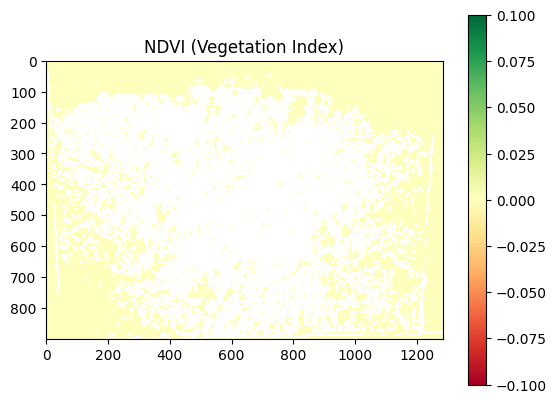

In [ ]:
def calculate_ndvi(red_band, nir_band):
    """Calculate NDVI (Normalized Difference Vegetation Index)."""
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    return ndvi

# Example of feature extraction
# Assuming Red band is at index 0 and NIR band is at index 0
# Adjust indices if necessary based on your raster data
# This is because the raster image has only 1 band
red_band = normalized_data[0, :, :]
nir_band = normalized_data[0, :, :]
ndvi = calculate_ndvi(red_band, nir_band)

# Plot NDVI
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title("NDVI (Vegetation Index)")
plt.show()

In [ ]:
!pip install tensorflow opencv-python

In [ ]:
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming `normalized_data` is the preprocessed input image and `labels` is the class label.
# Reshape the data to (1, height, width, bands)
X_reshaped = normalized_data.reshape(1, normalized_data.shape[1], normalized_data.shape[2], normalized_data.shape[0])  # (1, height, width, bands)

# Example label (change as necessary)
labels = np.array([1])  # For a single class

# Resize the normalized data before reshaping
resized_width = 512  # Adjust the desired width
resized_height = 512  # Adjust the desired height

resized_data = cv2.resize(normalized_data[0], (resized_width, resized_height))
resized_data = resized_data.reshape(1, resized_height, resized_width, 1) # Reshape the data to (1, height, width, bands)


# Update X_reshaped
X_reshaped = resized_data

# Define CNN model for classification
def build_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the CNN model
def train_cnn_model(model, X_train, y_train, epochs=10):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=1)  # batch_size=1 for one image
    return history

# Build the CNN model
num_classes = 5  # Example: Set the number of classes based on your task
cnn_model = build_cnn_model(input_shape=(X_reshaped.shape[1], X_reshaped.shape[2], X_reshaped.shape[3]), num_classes=num_classes)

# Train the model
history = train_cnn_model(cnn_model, X_reshaped, labels, epochs=10)

# Print the training history to check accuracy
print("Training history:", history.history)

# Evaluate the model on the same image (since we have only one image)
loss, accuracy = cnn_model.evaluate(X_reshaped, labels)
print(f"Evaluation - Loss: {loss}, Accuracy: {accuracy}")


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.0000e+00 - loss: 1.6037
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Training history: {'accuracy': [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [1.60372793674469, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming `normalized_data` is a numpy array with shape (bands, height, width)
# Example shape: (3, 256, 256) for 3 bands (e.g., Red, Green, Blue)

# Resize each band individually before reshaping
resized_width = 512  # Desired width
resized_height = 512  # Desired height

# Resize all bands to the desired height and width
resized_data = np.zeros((normalized_data.shape[0], resized_height, resized_width))
for i in range(normalized_data.shape[0]):  # Loop through each band
    resized_data[i] = cv2.resize(normalized_data[i], (resized_width, resized_height))

# Reshape to (1, height, width, bands) for CNN input
X_reshaped = resized_data.reshape(1, resized_height, resized_width, normalized_data.shape[0])

# Example label (modify as needed based on your task)
labels = np.array([1])  # For a single class, modify accordingly

# Define CNN model for classification
def build_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the CNN model
def train_cnn_model(model, X_train, y_train, epochs=10):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=1)  # batch_size=1 for one image
    return history

# Build the CNN model
num_classes = 5  # Example: Set the number of classes based on your task
cnn_model = build_cnn_model(input_shape=(X_reshaped.shape[1], X_reshaped.shape[2], X_reshaped.shape[3]), num_classes=num_classes)

# Train the model
history = train_cnn_model(cnn_model, X_reshaped, labels, epochs=10)

# Print the training history to check accuracy
print("Training history:", history.history)

# Evaluate the model on the same image (since we have only one image)
loss, accuracy = cnn_model.evaluate(X_reshaped, labels)
print(f"Evaluation - Loss: {loss}, Accuracy: {accuracy}")


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 1.5235
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Training history: {'accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [1.5234662294387817, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [ ]:
!pip install rioxarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
import matplotlib as mpl
from matplotlib import colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from osgeo import gdal
from osgeo import osr
# import pandas as pd
# import rasterio as rio
import rioxarray as rxr
from scipy.ndimage.filters import generic_filter
from scipy.stats import mode
# import seaborn as sns
# from time import time
from tqdm import tqdm
# from tqdm.notebook import tqdm as tqdm
from yellowbrick.cluster import KElbowVisualizer

from sklearn import cluster
# from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score, rand_score, adjusted_rand_score
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, calinski_harabasz_score, davies_bouldin_score
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
# from sklearn.preprocessing import StandardScaler

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l1

<ipython-input-17-8191e2ac5f40>:13: DeprecationWarning: Please import `generic_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import generic_filter


In [ ]:
import rioxarray as rxr

# Load the dataset
data_raster = rxr.open_rasterio('/content/WhatsApp Image 2024-12-13 at 13.02.33.jpeg').squeeze()

# Extract the extent
min_x = float(data_raster.coords['x'].min())
max_x = float(data_raster.coords['x'].max())
min_y = float(data_raster.coords['y'].min())
max_y = float(data_raster.coords['y'].max())
extent = [min_x, max_x, min_y, max_y]

# Read the data as a numpy array
data_array = np.array(data_raster)


/usr/local/lib/python3.10/dist-packages/rioxarray/_io.py:1143: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


In [ ]:
data_array

array([[[  6,   8,  11, ...,  37,  37,  36],
        [  6,   8,  11, ...,  37,  36,  36],
        [  6,   9,  12, ...,  36,  36,  35],
        ...,
        [ 15,  14,  14, ..., 115, 114, 114],
        [ 15,  14,  14, ..., 115, 114, 114],
        [ 15,  14,  14, ..., 115, 114, 114]],

       [[  7,   9,  16, ...,  38,  38,  37],
        [  7,   9,  16, ...,  38,  37,  37],
        [  7,  10,  17, ...,  37,  37,  36],
        ...,
        [ 13,  12,  12, ..., 149, 148, 148],
        [ 13,  12,  12, ..., 149, 148, 148],
        [ 13,  12,  12, ..., 149, 148, 148]],

       [[  9,  11,  19, ...,  42,  42,  41],
        [  9,  11,  19, ...,  42,  41,  41],
        [  9,  12,  20, ...,  41,  41,  40],
        ...,
        [ 14,  13,  13, ..., 174, 173, 173],
        [ 14,  13,  13, ..., 174, 173, 173],
        [ 14,  13,  13, ..., 174, 173, 173]]], dtype=uint8)

In [ ]:
np.ndim(data_array)

3

# section2

In [25]:
!pip install tensorflow numpy matplotlib


In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [3]:
import zipfile
import os

# Path to the zip file and extraction folder
zip_file_path = "/content/remote.zip"
extraction_folder = "extracted_images"

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_folder)

print(f"Images extracted to {extraction_folder}")


Images extracted to extracted_images


In [27]:
def load_dataset(dataset_path, img_size=(224, 224)):
    images, labels = [], []
    class_names = os.listdir(dataset_path)

    for idx, class_name in enumerate(class_names):
        class_path = os.path.join(dataset_path, class_name)
        for file in os.listdir(class_path):
            file_path = os.path.join(class_path, file)
            img = load_img(file_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(idx)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels, class_names

# Load dataset
dataset_path = '/content/extracted_images'  # Replace with your dataset folder
X, y, class_names = load_dataset(dataset_path)
y = to_categorical(y)  # Convert labels to one-hot encoding

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [28]:
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for validation/test data
val_test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_test_datagen.flow(X_val, y_val, batch_size=32)


In [29]:
# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base layers

# Add custom layers for mineral classification
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [30]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=len(X_train) // 32,
    validation_steps=len(X_val) // 32
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored

1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 1.0000 - loss: 0.00

In [31]:
test_generator = val_test_datagen.flow(X_test, y_test, batch_size=32)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 100.00%


In [32]:
def predict_mineral(model, img_path, class_names):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    return predicted_class

# Predict a new image
new_image_path = '/content/7.jpeg'  # Replace with your image path
predicted_mineral = predict_mineral(model, new_image_path, class_names)
print(f"Predicted Mineral: {predicted_mineral}")


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step
Predicted Mineral: remote


In [12]:
model.save('mineral_classifier.h5')


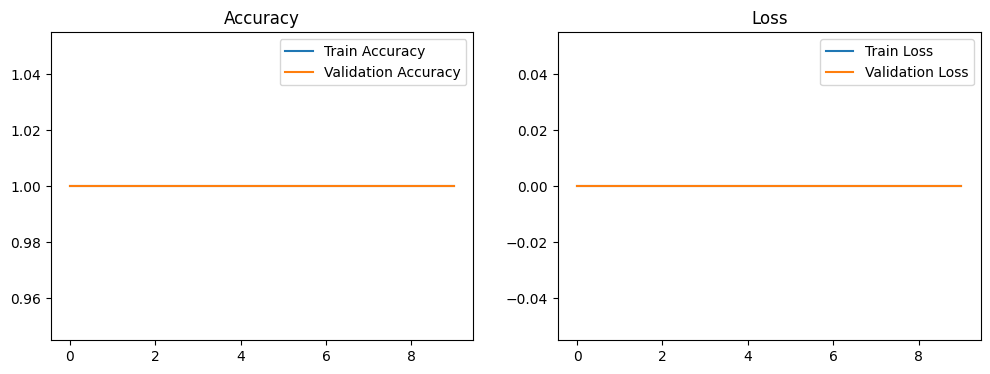

In [13]:
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load your trained model
model = load_model('/content/mineral_classifier.h5')  # Replace with your model's filename

# Define the class names (as used during training)
class_names = ['Quartz', 'Emerald', 'Ruby', 'Other']  # Replace with your actual class names

# Path to the new image
new_image_path = '/content/4.jpeg'  # Replace with your image's path

# Preprocess the image
img = load_img(new_image_path, target_size=(224, 224))  # Resize to model's input size
img_array = img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict using the model

prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]  # Get the class with highest probability
confidence = np.max(prediction) * 100  # Get the confidence percentage

print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
Predicted Class: Quartz
Confidence: 100.00%


# section 3